In [1]:
%matplotlib inline 
import os
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

C:\Apps\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in arccos
  


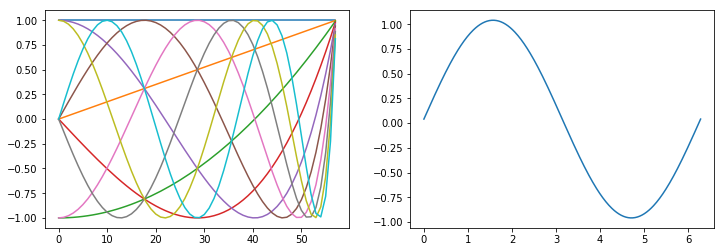

In [12]:
def chf(x, n): # These are the basis functions to be used
    return np.cos(n*np.arccos(x)) 
def fit_function(x):
    #noise = np.random.rand(1)/10
    return np.sin(x)

x = np.linspace(0, 2*np.pi, 360)
fig, ax = plt.subplots(ncols=2,nrows=1,figsize=(12,4))
for n in range(10):
    ax[0].plot(chf(x,n))
ax[1].plot(x, fit_function(x))

Text(0.5,0.98,'Fitting fit_function')

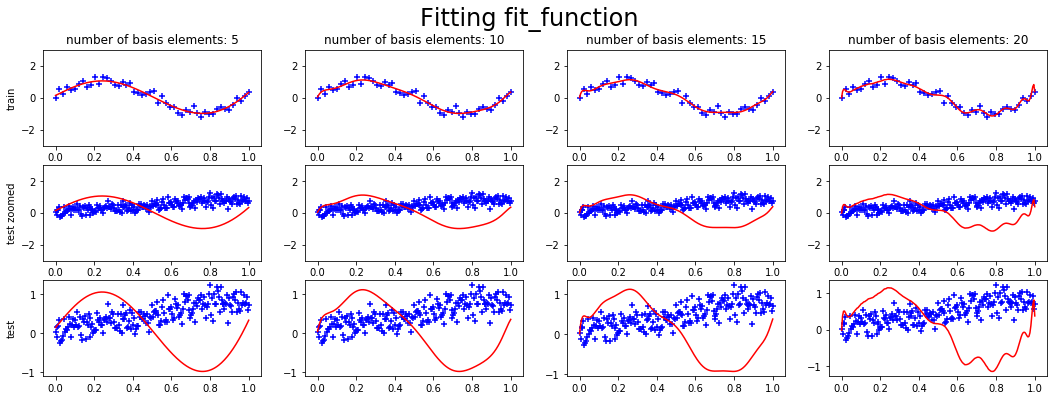

In [38]:
# svd approach
num_basis = [5, 10, 15, 20]
noise = 0.2
fig, ax = plt.subplots(nrows=3,ncols=len(num_basis),figsize=(18,6))
ntrain=50
Xtrain=np.linspace(0,1,ntrain)
#normalize
ytrain=np.atleast_2d(fit_function(Xtrain*2*np.pi)+noise*np.random.normal(0,1,ntrain)).T 
#ytrain.pd.dropna(inplace=True)

ntest=200
Xtest=np.linspace(0,1,ntest)
ytest=F(Xtest)+noise*np.random.normal(0,1,ntest)


for i, nb in enumerate(num_basis):
    ax[0][i].scatter(Xtrain,ytrain,marker='+',color='b')
    Amat = [np.ones(ntrain)]
    Amat_test = [np.ones(ntest)]
    for n in range(nb):
        Amat.append(chf(Xtrain,n+1))
    Amat = np.vstack(Amat).T
    what = np.linalg.pinv(Amat).dot(ytrain)
    y1train=Amat.dot(what)
    for n in range(nb):
        Amat_test.append(chf(Xtest,n+1))
    Amat_test = np.vstack(Amat_test).T
    ypred=Amat_test.dot(what)
    ax[1][i].scatter(Xtest,ytest,color='b',marker='+')
    ax[0][i].plot(Xtest,ypred,color='r')
    ax[1][i].plot(Xtest,ypred,color='r')
    ax[0][i].set_ylim([-3,3])
    ax[1][i].set_ylim([-3,3])
    ax[2][i].scatter(Xtest,ytest,color='b',marker='+')
    ax[2][i].plot(Xtest,ypred,color='r')
    title = "number of basis elements: "+str(num_basis[i])
    ax[0][i].set_title(title)
ax[0][0].set_ylabel('train')
ax[1][0].set_ylabel('test zoomed')
ax[2][0].set_ylabel('test')
fig.suptitle(r'Fitting fit_function',fontsize=24)

In [ ]:
# linear regression approach
def gradientdescent(Amat, y, winit, rate, numiter):
    n, p = Amat.shape
    whistory = []
    losshistory = [] 
    w = winit
    for i in range(numiter): 
        loss = np.square(y-Amat.dot(w)).mean()
        whistory.append(w)
        losshistory.append(loss)
        grad = (-2/n)*Amat.T.dot((y-Amat.dot(w)))
        w = w - rate*grad
    return w, np.asarray(whistory), np.asarray(losshistory)
